In [12]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


class RNN:
    
    def __init__(self, num_neurons, prior, task):
        self.num_neurons = num_neurons
        self.prior = prior
        with tf.variable_scope("rnn", reuse=tf.AUTO_REUSE):
            self.mu = tf.get_variable('mu', shape=(num_neurons, num_neurons,), dtype=tf.float32);
            self.rho = tf.get_variable('rho', shape=(num_neurons, num_neurons), dtype=tf.float32);
        self.sigma = tf.log(1.0 + tf.exp(self.rho));
        self.dt = 0.1;
        self.likelihood_var = 1.0;
        
    def forward(self, x0, h, W, num_timepts):
        xs = [x0];
        x = x0;
        for i in range(num_timepts):
            xdot = -x + tf.matmul(W, tf.tanh(x)) + h;
            x += self.dt*xdot;
            xs.append(x);
        return x, tf.concat(xs, 2);
            
    def draw_W(self, num_batch):
        eps = tf.random.normal((num_batch, self.num_neurons, self.num_neurons));
        W = tf.multiply(tf.expand_dims(self.sigma, 0), eps) + tf.expand_dims(self.mu, 0);
        return W;
    
    def likelihood(self, y, target):
        likelihood = -tf.reduce_sum(tf.square(y - target));
        return likelihood;
    
    def 
    

In [13]:
def rnn_vi(num_neurons, task, prior):
    num_batch = 100;
    num_init = 10;
    rnn = RNN(num_neurons, num_y, prior);
    
    if (task == 'GNG'):
        num_y = 1;
        h = np.random.normal(0, 1, (1, num_neurons, 1));
        C = np.random.normal(0, 1, (1, num_y, num_neurons));
        target = np.ones(1, num_y, 1);
        
    
    x0 = tf.random.normal(shape=(num_init, num_neurons,));
    x0 = tf.reshape(tf.tile(tf.expand_dims(x0,1), [num_batch, 1, 1]), [num_batch*num_init, num_neurons, 1]);
    
    W = rnn.draw_W(num_batch);
    W = tf.reshape(tf.tile(tf.expand_dims(W, 1), [1, num_init, 1, 1]), [num_batch*num_init, num_neurons, num_neurons]);
    
    num_timepts = 20;
    
    x, xs = rnn.forward(x0, h, W, num_timepts);
    y = tf.matmul(C, x);
    ys = tf.matmul(C, xs);
    
    if (task == 'GNG'):
        likelihood = rnn.likelihood(y, target)
    
    return rnn, x, xs



In [14]:
num_neurons = 100;
task = 'GNG';
prior = {'mu': np.zeros((num_neurons,)), 'sigma': np.ones((num_neurons,))};

rnn, x, xs = rnn_vi(num_neurons, task, prior);

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer());
    _xs = sess.run(xs);


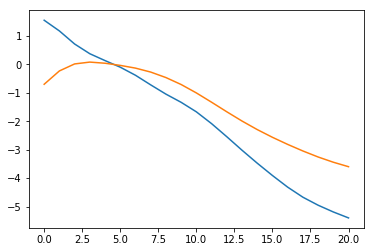

In [16]:
plt.plot(_xs[0, 0, :]);
plt.plot(_xs[1, 0, :]);